In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv")
df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


# TABLE DESCRIPTION

#### The table includes the client's previous credit records from financial institutions, excluding Home Credit Group, as reported by the Credit Bureau.

In [3]:
description = pd.read_csv('D:\data prep\project data\dseb63_columns_description.csv',encoding='latin',index_col=0)
description = description[description['Table'].str.contains('bureau')].drop(columns = 'Table',axis = 0).set_index("Row")
description

,Description,Special
Row,,
SK_ID_CURR,ID of loan in our sample - one loan in our sam...,hashed
SK_BUREAU_ID,Recoded ID of previous Credit Bureau credit re...,hashed
CREDIT_ACTIVE,Status of the Credit Bureau (CB) reported credits,NaN
CREDIT_CURRENCY,Recoded currency of the Credit Bureau credit,recoded
DAYS_CREDIT,How many days before current application did c...,time only relative to the application
CREDIT_DAY_OVERDUE,Number of days past due on CB credit at the ti...,NaN
DAYS_CREDIT_ENDDATE,Remaining duration of CB credit (in days) at t...,time only relative to the application
DAYS_ENDDATE_FACT,Days since CB credit ended at the time of appl...,time only relative to the application
AMT_CREDIT_MAX_OVERDUE,Maximal amount overdue on the Credit Bureau cr...,NaN


Chuyển ngày thành năm

In [4]:
df['DAYS_CREDIT_ENDDATE'][df['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
df['DAYS_ENDDATE_FACT'][df['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
df['DAYS_CREDIT_UPDATE'][df['DAYS_CREDIT_UPDATE'] > -50*365] = np.nan

C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\434322992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAYS_CREDIT_ENDDATE'][df['DAYS_CREDIT_ENDDATE'] > -50*365] = np.nan
C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\434322992.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DAYS_ENDDATE_FACT'][df['DAYS_ENDDATE_FACT'] > -50*365] = np.nan
C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\434322992.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

# CHECK DUPES

In [5]:
df.duplicated().sum()

0

# CHECK NULL

In [6]:
number_missing = df.isnull().sum()
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'number_missing' : number_missing,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,number_missing,percent_missing
SK_ID_BUREAU,SK_ID_BUREAU,0,0.000000
CREDIT_ACTIVE,CREDIT_ACTIVE,0,0.000000
CREDIT_CURRENCY,CREDIT_CURRENCY,0,0.000000
DAYS_CREDIT,DAYS_CREDIT,0,0.000000
CREDIT_DAY_OVERDUE,CREDIT_DAY_OVERDUE,0,0.000000
DAYS_CREDIT_ENDDATE,DAYS_CREDIT_ENDDATE,1465191,99.990855
DAYS_ENDDATE_FACT,DAYS_ENDDATE_FACT,1465324,99.999932
AMT_CREDIT_MAX_OVERDUE,AMT_CREDIT_MAX_OVERDUE,948545,64.732738
CNT_CREDIT_PROLONG,CNT_CREDIT_PROLONG,0,0.000000
AMT_CREDIT_SUM,AMT_CREDIT_SUM,3,0.000205


In [7]:
columns = df.loc[:,(df.isnull().sum(axis = 0) / df.shape[0]) >= 0.9].columns
columns

Index(['DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'], dtype='object')

### 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT' and 'DAYS_CREDIT_UPDATE' have >90%null. So removing is necessary

# CHECK OUTLIERS

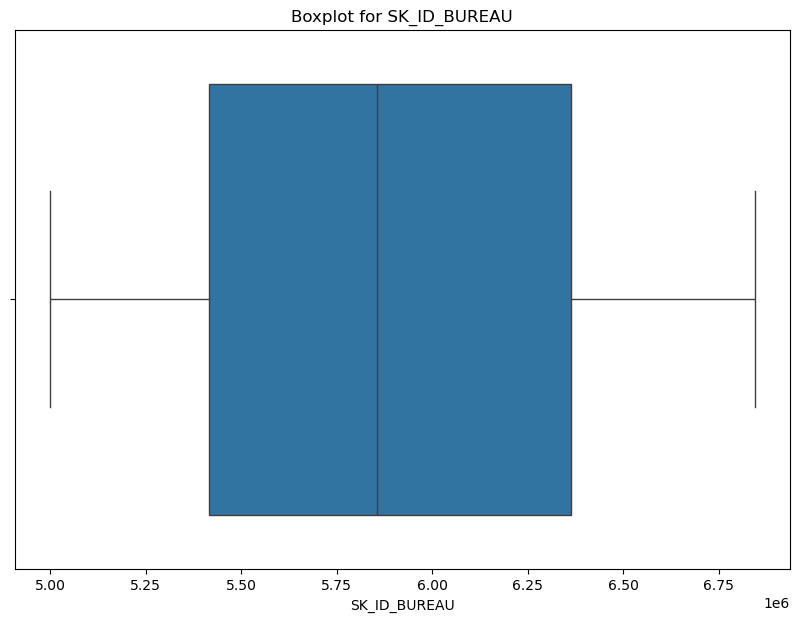

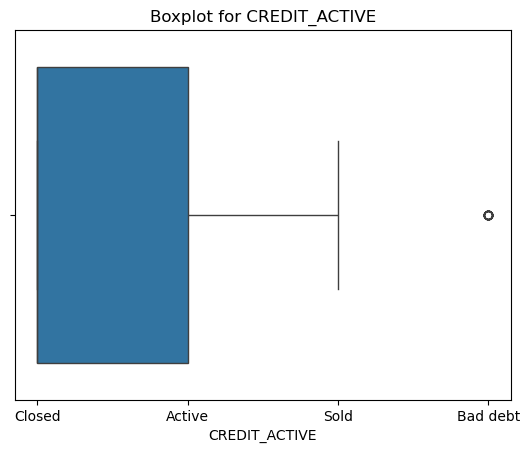

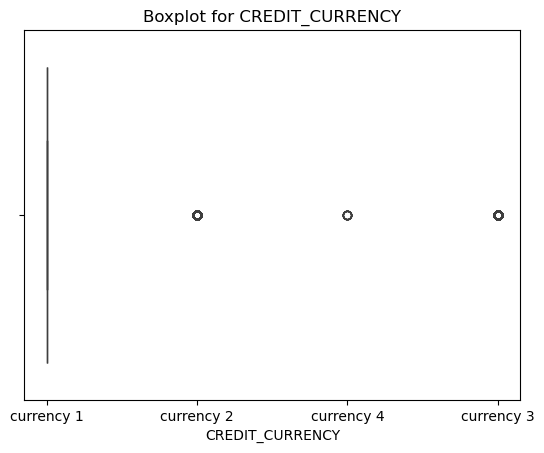

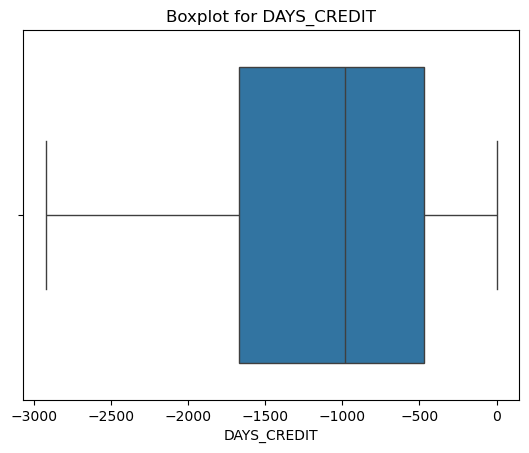

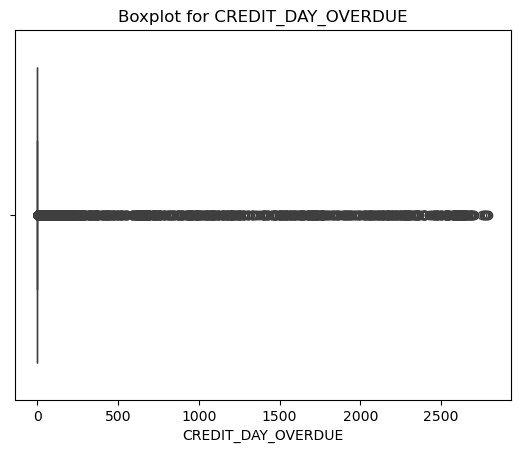

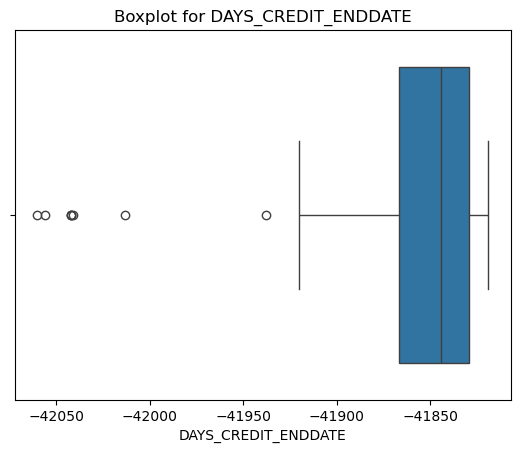

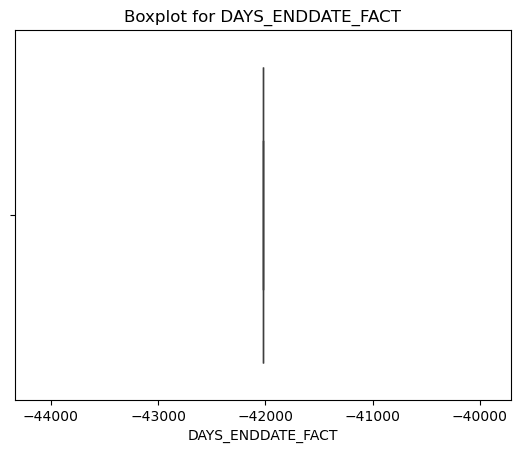

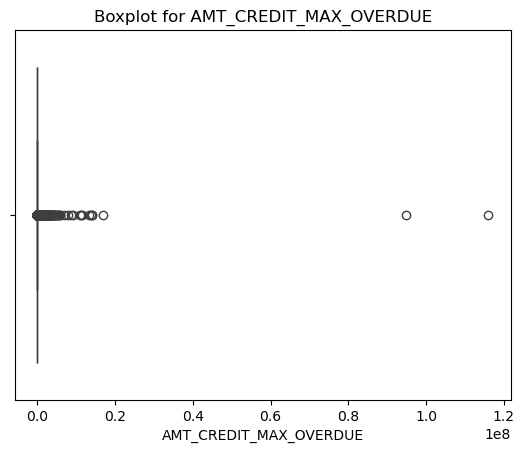

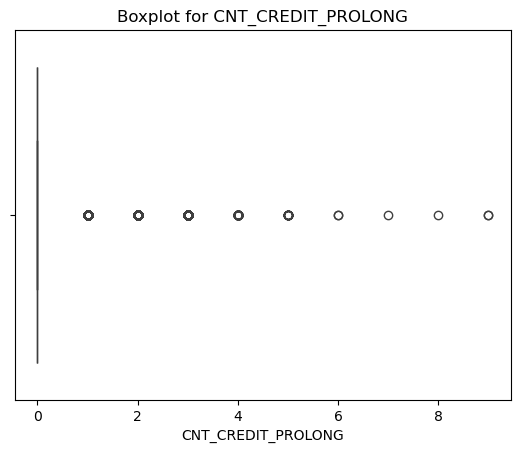

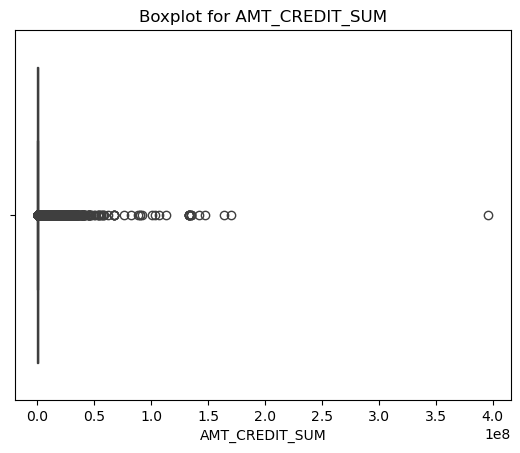

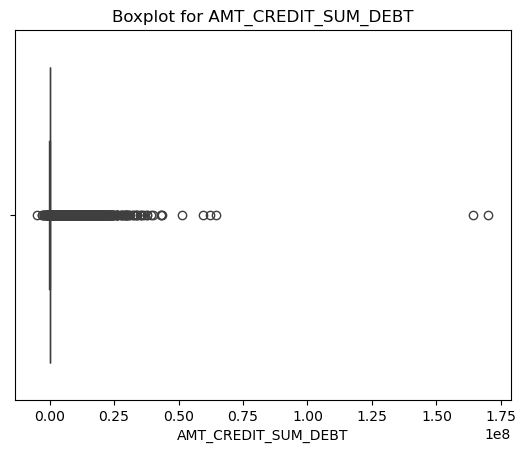

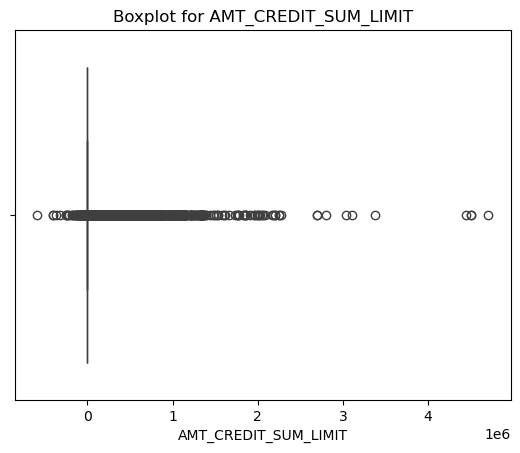

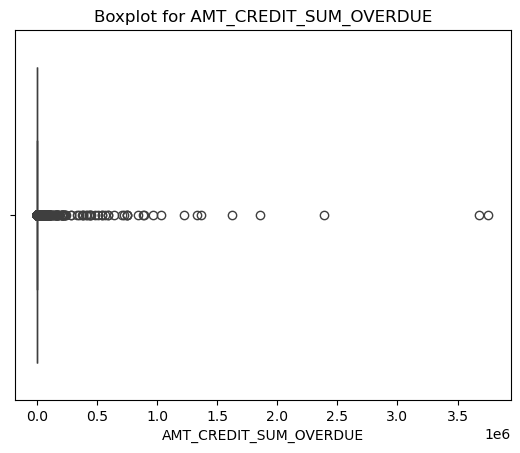

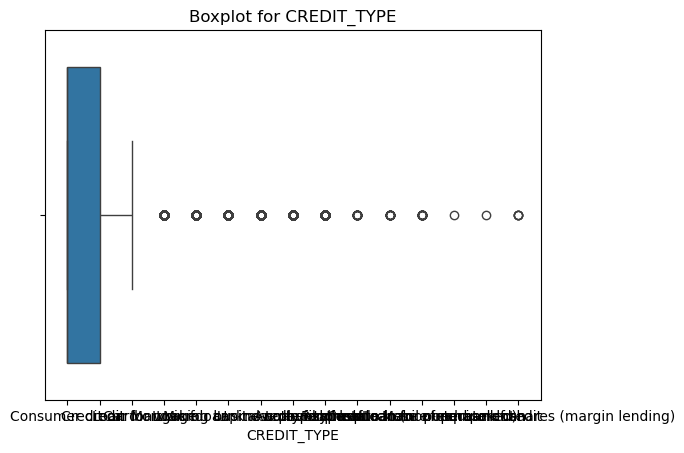

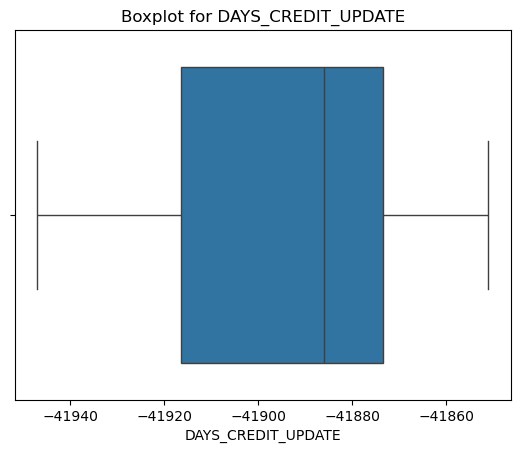

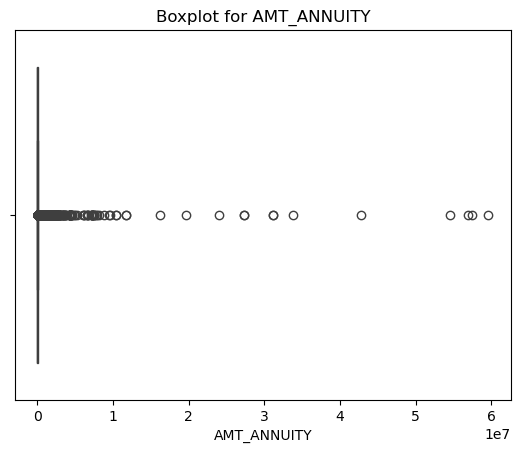

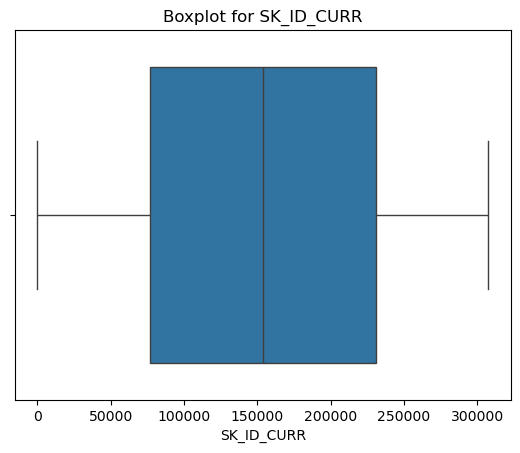

In [8]:
plt.figure(figsize=(10, 7))

for column in df.columns:
    sns.boxplot(x=df[column])

    plt.title(f'Boxplot for {column}')

    plt.show()

# CHECK VALID

In [9]:
numerical_data = df._get_numeric_data()

In [10]:
for column in numerical_data.columns:
    great0 = df[column][df[column] > 0].count()
    equal0 =  df[column][df[column] == 0].count()
    small0 = df[column][df[column] < 0].count()
    nan_total = df[column].isnull().sum()
    other_value = df.shape[0] - great0 - small0 - nan_total - equal0
    print(f'{column} has  >0: {great0}, =0: {equal0}, <0: {small0}, nan: {nan_total}, other values: {other_value}')

SK_ID_BUREAU has  >0: 1465325, =0: 0, <0: 0, nan: 0, other values: 0
DAYS_CREDIT has  >0: 0, =0: 4, <0: 1465321, nan: 0, other values: 0
CREDIT_DAY_OVERDUE has  >0: 3706, =0: 1461619, <0: 0, nan: 0, other values: 0
DAYS_CREDIT_ENDDATE has  >0: 0, =0: 0, <0: 134, nan: 1465191, other values: 0
DAYS_ENDDATE_FACT has  >0: 0, =0: 0, <0: 1, nan: 1465324, other values: 0
AMT_CREDIT_MAX_OVERDUE has  >0: 107137, =0: 409643, <0: 0, nan: 948545, other values: 0
CNT_CREDIT_PROLONG has  >0: 8820, =0: 1456505, <0: 0, nan: 0, other values: 0
AMT_CREDIT_SUM has  >0: 1409394, =0: 55928, <0: 0, nan: 3, other values: 0
AMT_CREDIT_SUM_DEBT has  >0: 369163, =0: 864650, <0: 8418, nan: 223094, other values: 0
AMT_CREDIT_SUM_LIMIT has  >0: 64880, =0: 910424, <0: 351, nan: 489670, other values: 0
AMT_CREDIT_SUM_OVERDUE has  >0: 3644, =0: 1461681, <0: 0, nan: 0, other values: 0
DAYS_CREDIT_UPDATE has  >0: 0, =0: 0, <0: 95, nan: 1465230, other values: 0
AMT_ANNUITY has  >0: 168026, =0: 167286, <0: 0, nan: 113001

In [11]:
categorical_data = df.drop(columns=numerical_data.columns)

In [12]:
for column in categorical_data.columns:
    unique_values = categorical_data[column].unique()
    print(f'col {column} : {list(unique_values)}\n')

col CREDIT_ACTIVE : ['Closed', 'Active', 'Sold', 'Bad debt']

col CREDIT_CURRENCY : ['currency 1', 'currency 2', 'currency 4', 'currency 3']

col CREDIT_TYPE : ['Consumer credit', 'Credit card', 'Car loan', 'Mortgage', 'Microloan', 'Loan for working capital replenishment', 'Loan for business development', 'Unknown type of loan', 'Another type of loan', 'Real estate loan', 'Loan for the purchase of equipment', 'Cash loan (non-earmarked)', 'Mobile operator loan', 'Interbank credit', 'Loan for purchase of shares (margin lending)']



# EDA Internal

## Univariate Analysis

# CHECK DISTRIBUTION OF CATEGORICAL

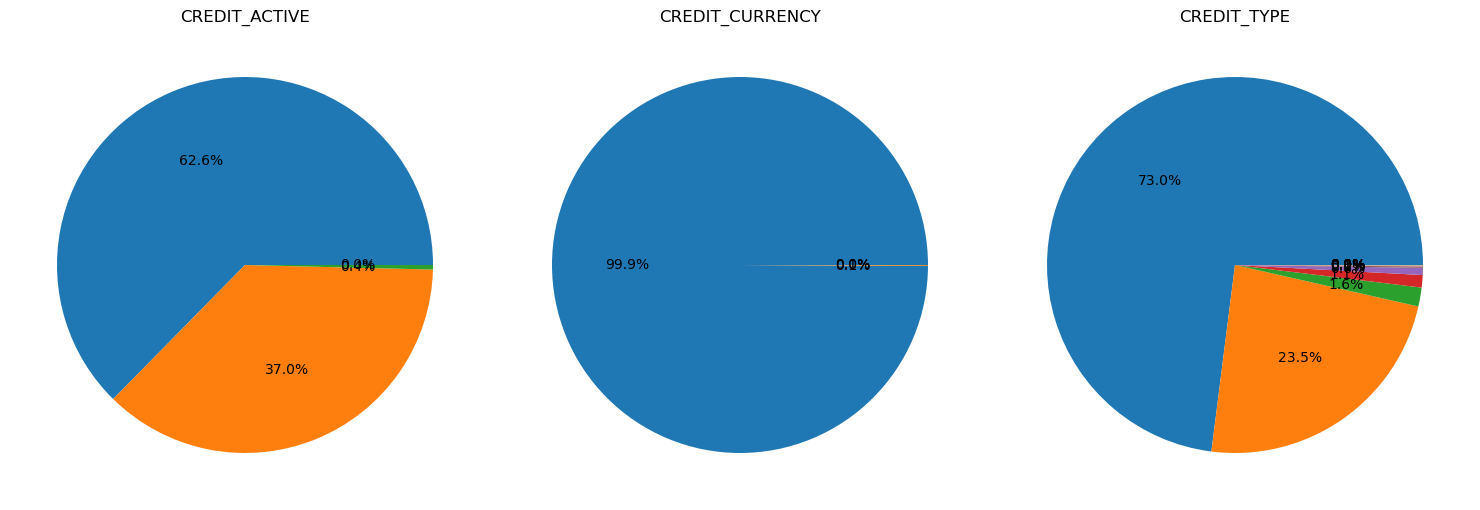

In [13]:
columns = categorical_data.columns

num_rows = 1
num_cols = len(columns)

fig, ax = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 5))

column_index = 0

for col in range(num_cols):
    sizes = categorical_data[columns[column_index]].value_counts(normalize=True)
    ax[col].pie(sizes, autopct='%1.1f%%')
    ax[col].set_title(columns[column_index], color='black')
    column_index += 1

plt.tight_layout()

plt.show()

In [14]:
for col in range(num_cols):
    column_name = columns[col]
    sizes = categorical_data[column_name].value_counts(normalize=True)
    
    print(f"\nInsights for {column_name}:")
    
    for category, percentage in sizes.iteritems():
        print(f"{category}: {percentage * 100:.2f}%")
    
    print(f"Total Unique Categories: {len(sizes)}")


Insights for CREDIT_ACTIVE:
Closed: 62.63%
Active: 36.98%
Sold: 0.39%
Bad debt: 0.00%
Total Unique Categories: 4

Insights for CREDIT_CURRENCY:
currency 1: 99.92%
currency 2: 0.07%
currency 3: 0.01%
currency 4: 0.00%
Total Unique Categories: 4

Insights for CREDIT_TYPE:
Consumer credit: 72.99%
Credit card: 23.47%
Car loan: 1.62%
Mortgage: 1.07%
Microloan: 0.61%
Loan for business development: 0.12%
Another type of loan: 0.06%
Unknown type of loan: 0.03%
Loan for working capital replenishment: 0.03%
Real estate loan: 0.00%
Cash loan (non-earmarked): 0.00%
Loan for the purchase of equipment: 0.00%
Loan for purchase of shares (margin lending): 0.00%
Mobile operator loan: 0.00%
Interbank credit: 0.00%
Total Unique Categories: 15


C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():
C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\2950117082.py:7: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for category, percentage in sizes.iteritems():


Trạng thái tín dụng của Bureau: 62.63% là Closed, 36.98% là Active, 0.39% là đã được bán, <0.1% là nợ xấu\

4 loại tiền tệ, trong đó loại 1 chiếm đa số 99.92%\

15 loại tín dụng, trong đó đa số là 2 loại Consumer Credit là 72.99% và Credit Card là 23.47%%

### Followed this chart, we can see that CREDIT_CURRENCY have signigicant difference between each value -> we can drop this column

## Bivariate Analysis

# CREATE CORRELATION MATRIX

In [15]:
correlation_matrix = df.corr()
correlation_matrix

C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\868109210.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,SK_ID_BUREAU,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
SK_ID_BUREAU,1.000000,0.014469,-0.001878,-0.213924,NaN,0.002837,0.002658,0.008040,0.006045,-0.003956,-0.000491,-0.038517,0.002711,-0.003786
DAYS_CREDIT,0.014469,1.000000,-0.028343,-0.101337,NaN,-0.014414,-0.032111,0.055663,0.136678,0.024584,-0.000603,-0.012636,0.000144,0.001774
CREDIT_DAY_OVERDUE,-0.001878,-0.028343,1.000000,NaN,NaN,0.001240,0.002809,-0.003627,-0.002552,-0.000310,0.095782,NaN,-0.000408,0.000059
DAYS_CREDIT_ENDDATE,-0.213924,-0.101337,NaN,1.000000,NaN,-0.263080,NaN,-0.106577,0.013602,-0.028215,NaN,NaN,0.878052,-0.076623
DAYS_ENDDATE_FACT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AMT_CREDIT_MAX_OVERDUE,0.002837,-0.014414,0.001240,-0.263080,NaN,1.000000,0.001483,0.085068,0.013129,0.000185,0.015068,NaN,0.001357,0.000246
CNT_CREDIT_PROLONG,0.002658,-0.032111,0.002809,NaN,NaN,0.001483,1.000000,-0.009257,-0.001271,0.076587,-0.000009,NaN,-0.000663,0.000134
AMT_CREDIT_SUM,0.008040,0.055663,-0.003627,-0.106577,NaN,0.085068,-0.009257,1.000000,0.667766,0.003508,0.006779,0.015677,0.051585,-0.001292
AMT_CREDIT_SUM_DEBT,0.006045,0.136678,-0.002552,0.013602,NaN,0.013129,-0.001271,0.667766,1.000000,-0.019174,0.007909,NaN,0.016077,-0.000788
AMT_CREDIT_SUM_LIMIT,-0.003956,0.024584,-0.000310,-0.028215,NaN,0.000185,0.076587,0.003508,-0.019174,1.000000,-0.000711,-0.017221,0.003674,0.000932


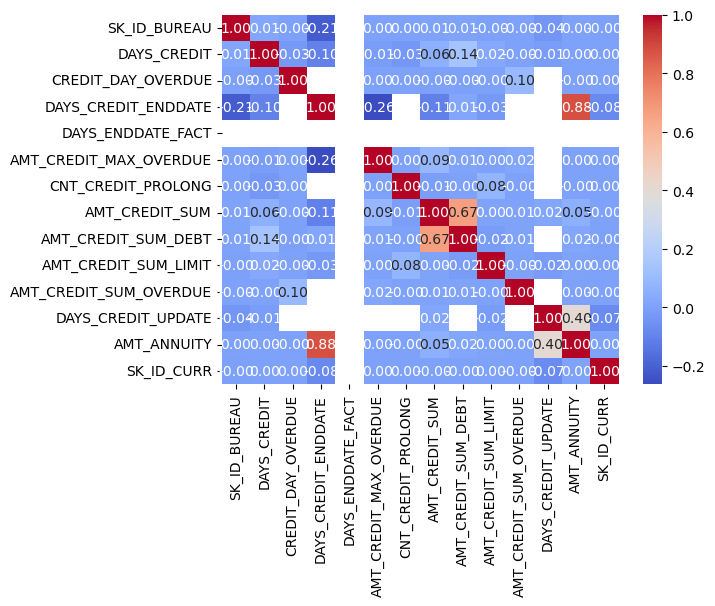

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
max_corr = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()
print("Các cặp features có correlation cao nhất:\n", max_corr.head())

Các cặp features có correlation cao nhất:
 SK_ID_BUREAU         SK_ID_BUREAU           1.000000
AMT_ANNUITY          DAYS_CREDIT_ENDDATE    0.878052
AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM         0.667766
DAYS_CREDIT_UPDATE   AMT_ANNUITY            0.403111
AMT_CREDIT_SUM_DEBT  DAYS_CREDIT            0.136678
dtype: float64


DAYS_ENDDATE_FACT and DAYS_CREDIT, DAYS_CREDIT_UPDATE columns have high correlation -> two of them can be dropped

In [18]:
#Drop cột có thể
new_df = df.drop(columns=['CREDIT_CURRENCY','DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE', 'DAYS_CREDIT_ENDDATE'])
new_df.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629
1,5714463,Active,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629
2,5714464,Active,-203,0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629
3,5714465,Active,-203,0,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629
4,5714466,Active,-629,0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629


# MERGE WITH TARGET TABLE

## EDA External

In [19]:
df2 = pd.read_csv("D:\data prep\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv")
df2 = df2[['SK_ID_CURR','TARGET']]
df2.head()

,SK_ID_CURR,TARGET
0,278621,0
1,139008,0
2,138348,0
3,64140,0
4,219374,0


In [20]:
merge_table = pd.merge(new_df, df2, on='SK_ID_CURR', how='left')
merge_table.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,DAYS_CREDIT,CREDIT_DAY_OVERDUE,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,AMT_ANNUITY,SK_ID_CURR,TARGET
0,5714462,Closed,-497,0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,NaN,254629,0.0
1,5714463,Active,-208,0,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,NaN,254629,0.0
2,5714464,Active,-203,0,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,NaN,254629,0.0
3,5714465,Active,-203,0,NaN,0,90000.0,NaN,NaN,0.0,Credit card,NaN,254629,0.0
4,5714466,Active,-629,0,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,NaN,254629,0.0


# CHECK DISTRIBUTION OF NUMERICAL

In [21]:
numerical_data = new_df._get_numeric_data()

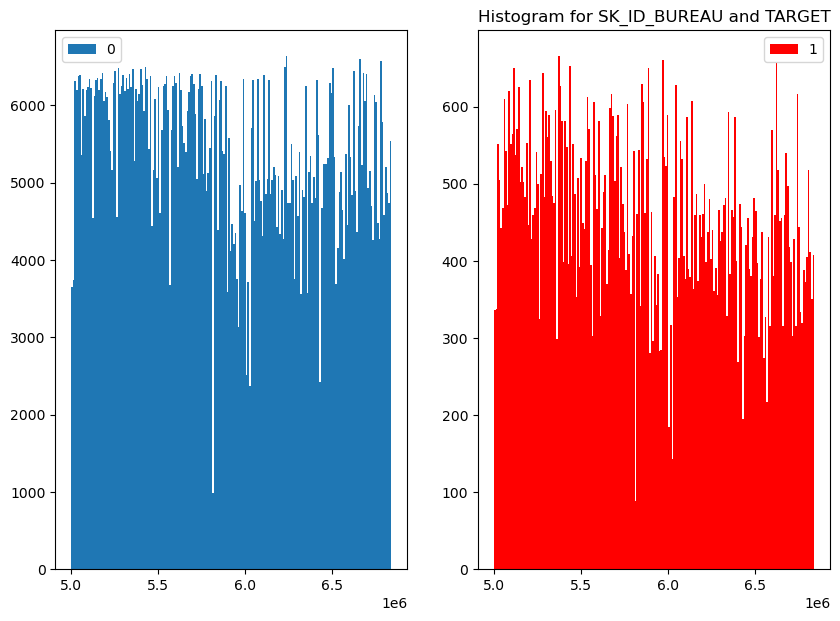

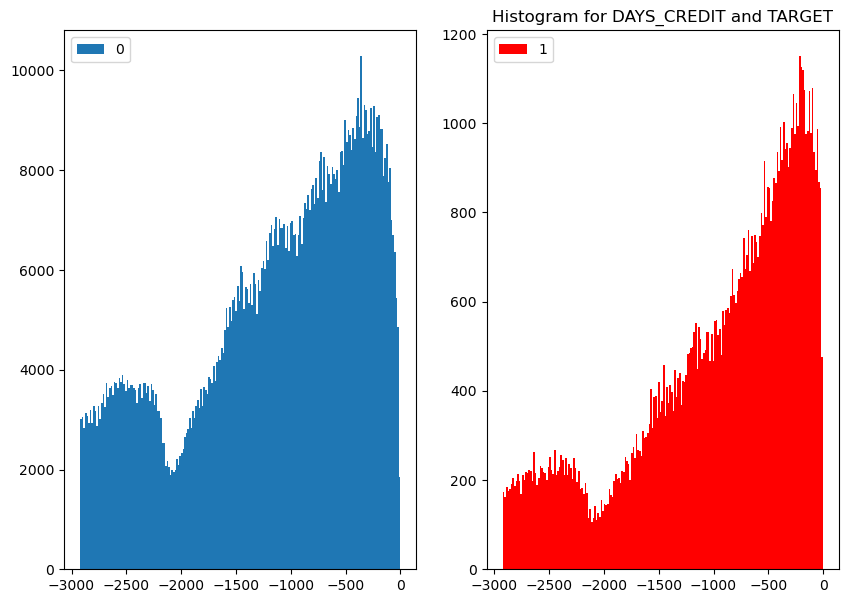

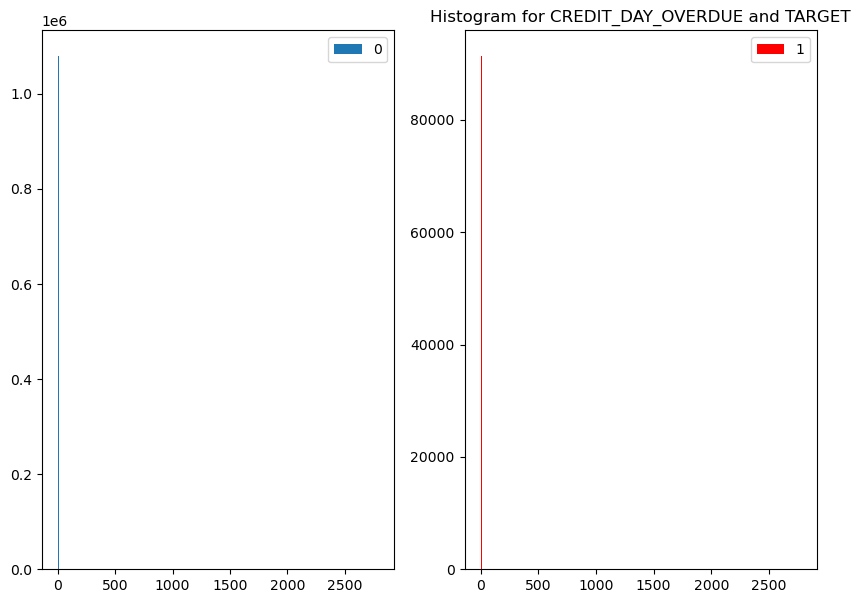

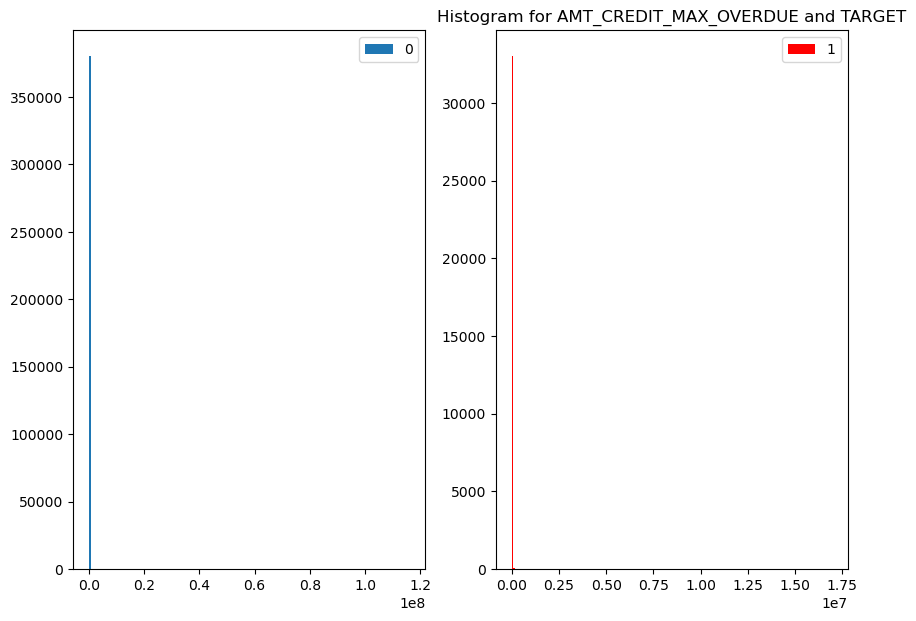

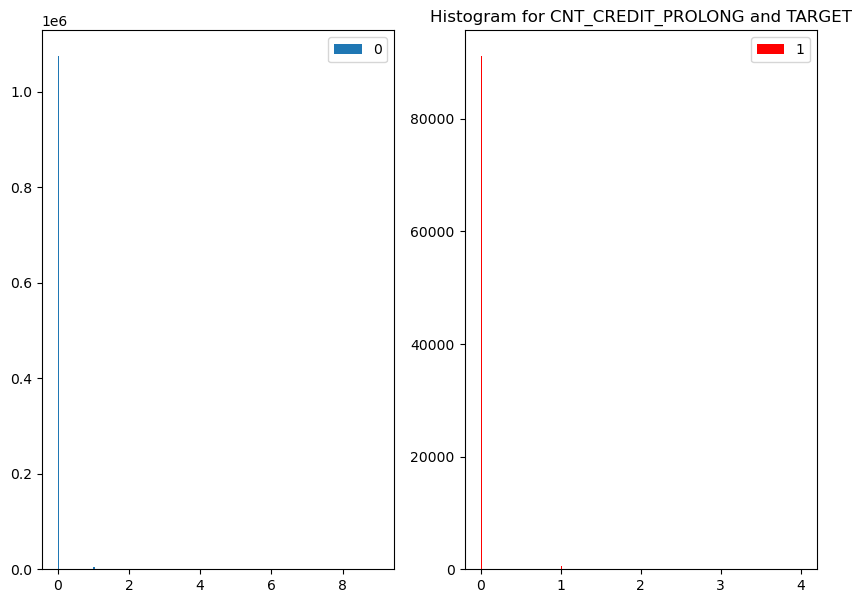

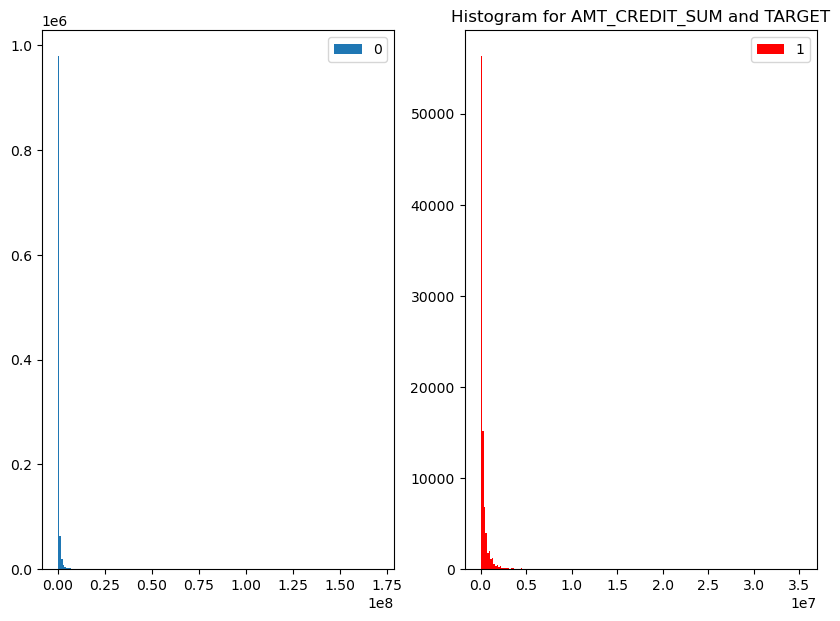

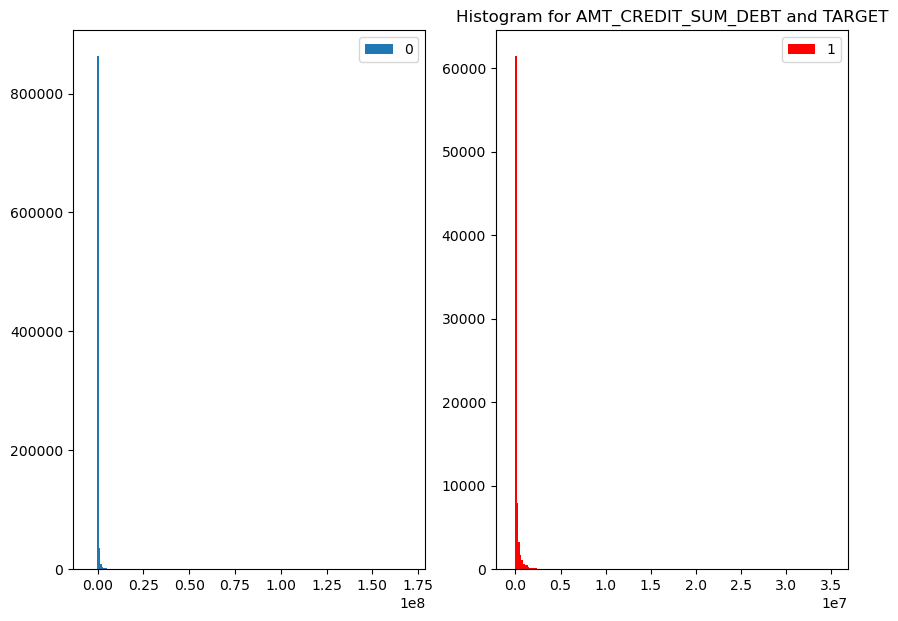

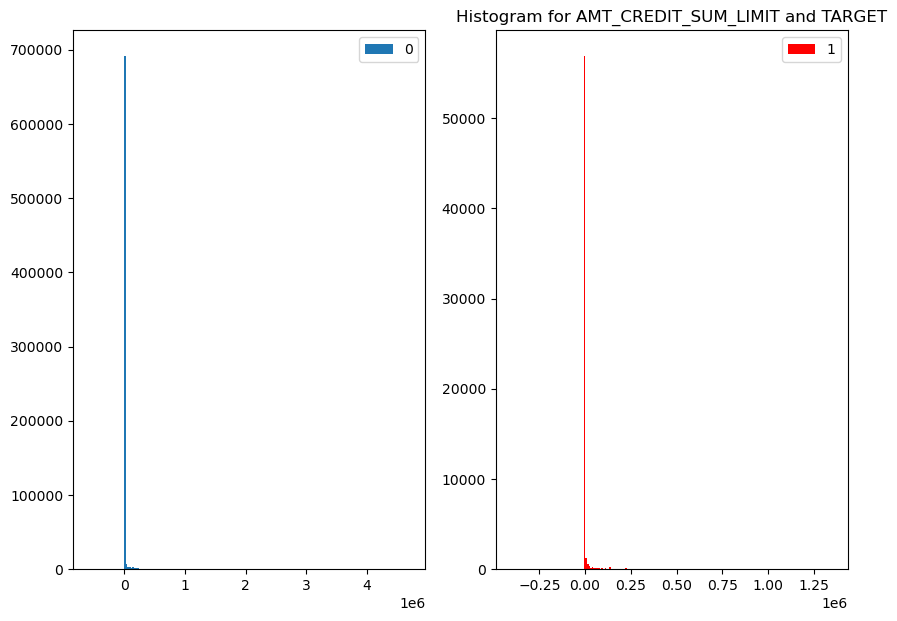

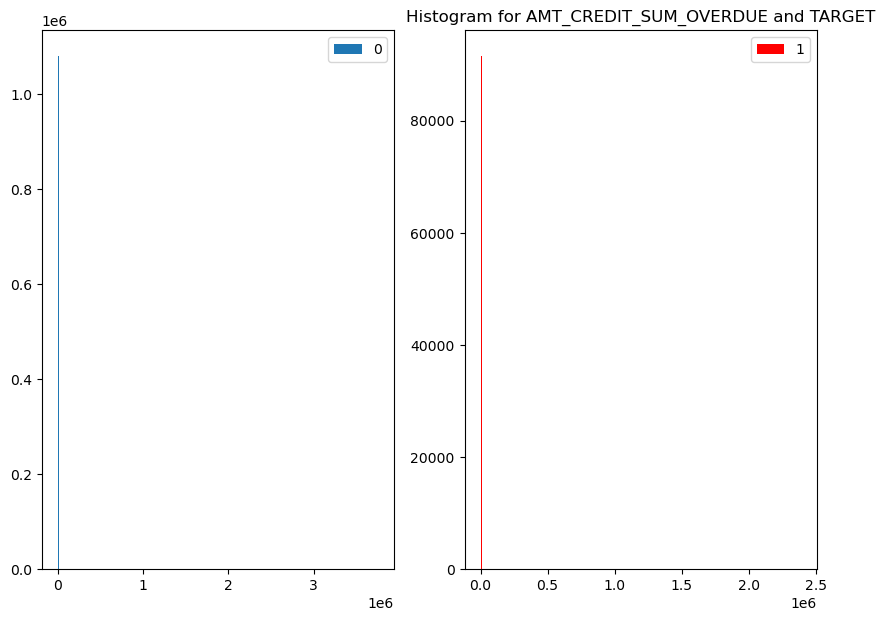

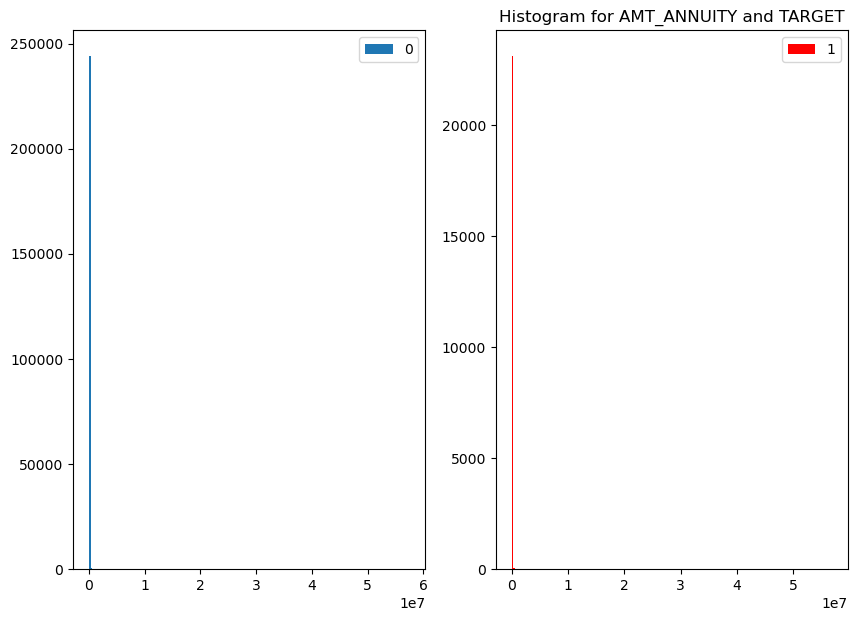

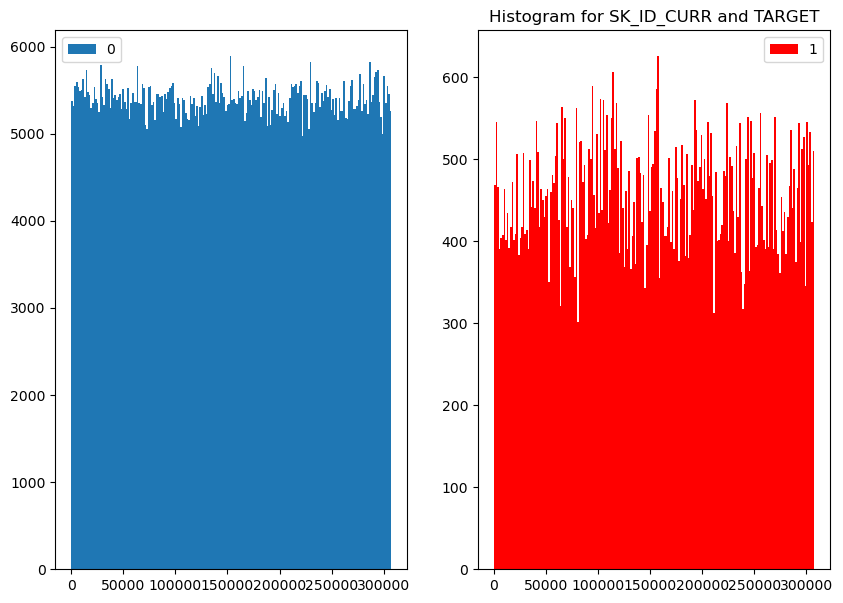

In [22]:
for col in numerical_data:
    fig,ax = plt.subplots(1,2,figsize =(10,7))
    class0 = merge_table[merge_table['TARGET']==0][col]
    class1 = merge_table[merge_table['TARGET']==1][col]
    ax[0].hist(class0,bins = 200,label = 0)
    ax[1].hist(class1,bins = 200,color = 'red',label= 1)
    ax[0].legend()
    ax[1].legend()
    plt.title(f'Histogram for {col} and TARGET')

### Distribution khá giống nhau --> Không ảnh hưởng nhiều đến biến TARGET

# CHECK DISTRIBUTION OF NEWLY-ADDED FEATURES

In [23]:
def visualize_distribution(x, title, color):
    """
    Visualize the distribution of a variable using a distplot and boxplot.

    Parameters:
        x: array-like
            The data to be visualized.
        title: str
            Title for the visualization.
        color: str
            Color for the plots.
    """
    # Create a figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

    # Distplot
    sns.distplot(x, ax=ax1, color=color)
    ax1.set(xlabel=None)
    ax1.set_title('Distribution Plot')

    # Boxplot
    sns.boxplot(x, ax=ax2, color=color)
    ax2.set(xlabel=None)
    ax2.set_title('Boxplot')

    # Set super title
    fig.suptitle(title, fontsize=20)

    # Adjust layout and display the plots
    plt.tight_layout()
    plt.show()

In [68]:
def visualize_count_distribution(merge_table, column_name, num_bins=10, figsize=(15, 8)):
    """
    Visualize the count distribution of a continuous variable for each TARGET category using a count plot.

    Parameters:
        data: DataFrame
            The DataFrame containing the data.
        column_name: str
            The name of the column for which to visualize the distribution.
        num_bins: int, default=10
            Number of bins for binning the continuous variable.
        figsize: tuple, default=(15, 8)
            Size of the figure.
    """
    plt.figure(figsize=figsize)
    sns.set_style('whitegrid')

    # Binning the continuous variable
    bins = np.linspace(merge_table[column_name].min(), merge_table[column_name].max(), num_bins + 1)
    merge_table['binned'] = pd.cut(merge_table[column_name], bins)

     # Distplot
    plt.subplot(1, 3, 1)
    sns.histplot(merge_table[column_name], kde=True, color='blue')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Distplot of {column_name}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=merge_table['TARGET'], y=merge_table[column_name], color='orange')
    plt.title(f'Box Plot of {column_name}')
    plt.ylabel(column_name)

    # Countplot with binned values
    plt.subplot(1, 3, 3)
    sns.countplot(x='binned', hue='TARGET', data=merge_table)
    plt.title(f'Count Distribution of {column_name} for each TARGET category')
    plt.xlabel(f'{column_name} (Binned)')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')

    plt.tight_layout()
    plt.show()
    

### Number of past loans per customer

In [29]:
num_past_loan_target = merge_table[['SK_ID_CURR', 'DAYS_CREDIT', 'TARGET']].groupby(['SK_ID_CURR', 'TARGET'])['DAYS_CREDIT'].count().reset_index()
num_past_loan_target.columns = ['SK_ID_CURR','TARGET','num_of_past_loans']
num_past_loan_target

,SK_ID_CURR,TARGET,num_of_past_loans
0,0,0.0,1
1,1,1.0,1
2,2,0.0,6
3,3,0.0,7
4,4,0.0,6
...,...,...,...
210804,307501,0.0,5
210805,307504,0.0,4
210806,307505,0.0,2
210807,307506,0.0,4


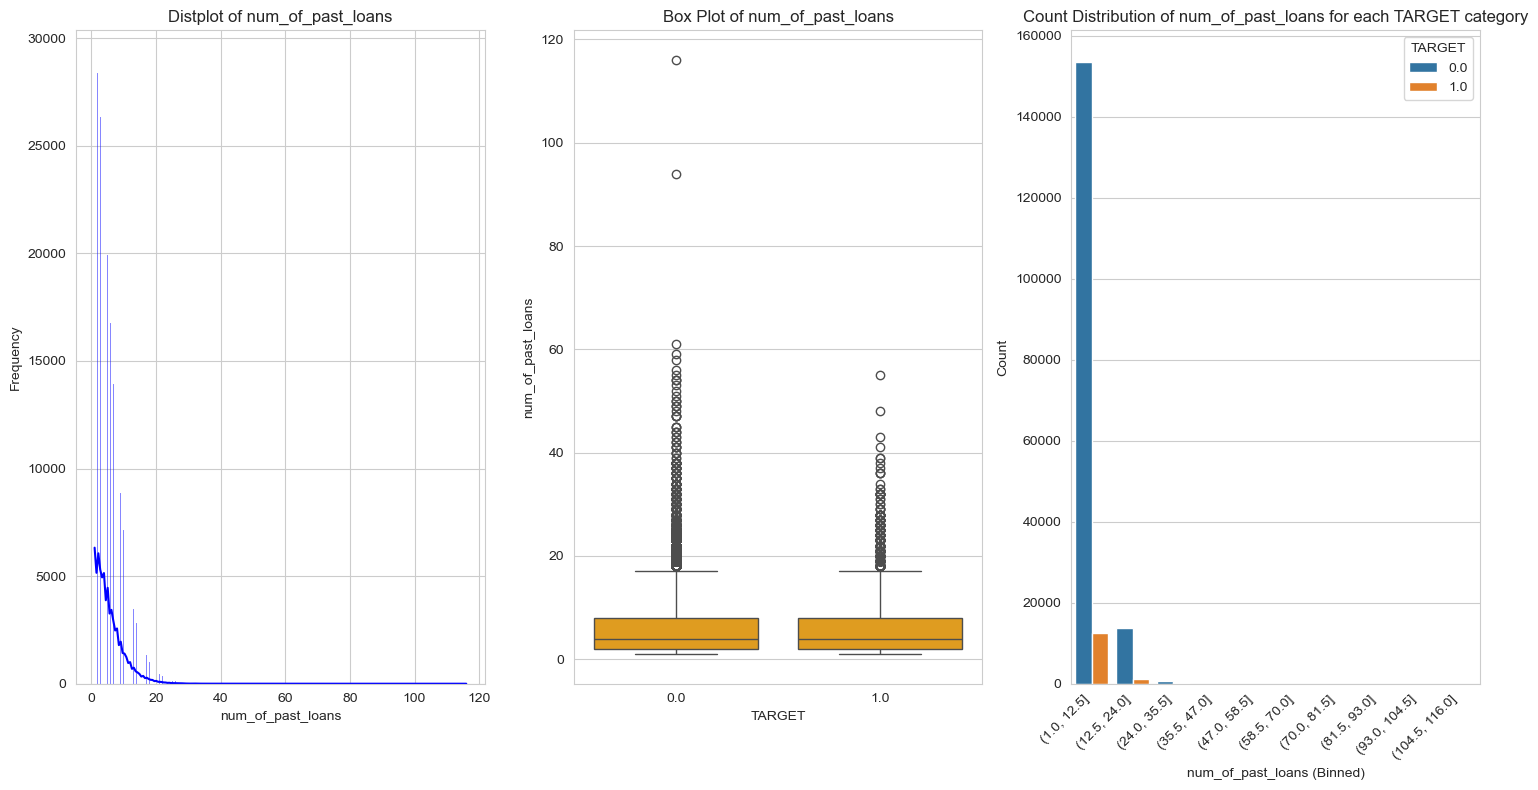

In [69]:
visualize_count_distribution(num_past_loan_target, 'num_of_past_loans', figsize=(15, 8))

The distribution is quite the same. This feature does not affect TARGET varibale

### Number of types of past loans per customer

In [34]:
num_of_type_target = merge_table[['SK_ID_CURR','CREDIT_TYPE','TARGET']].groupby(['SK_ID_CURR','TARGET']).nunique().reset_index()
num_of_type_target.columns = ['SK_ID_CURR','TARGET','num_of_credit_type']
num_of_type_target

,SK_ID_CURR,TARGET,num_of_credit_type
0,0,0.0,1
1,1,1.0,1
2,2,0.0,1
3,3,0.0,2
4,4,0.0,2
...,...,...,...
210804,307501,0.0,3
210805,307504,0.0,1
210806,307505,0.0,2
210807,307506,0.0,1


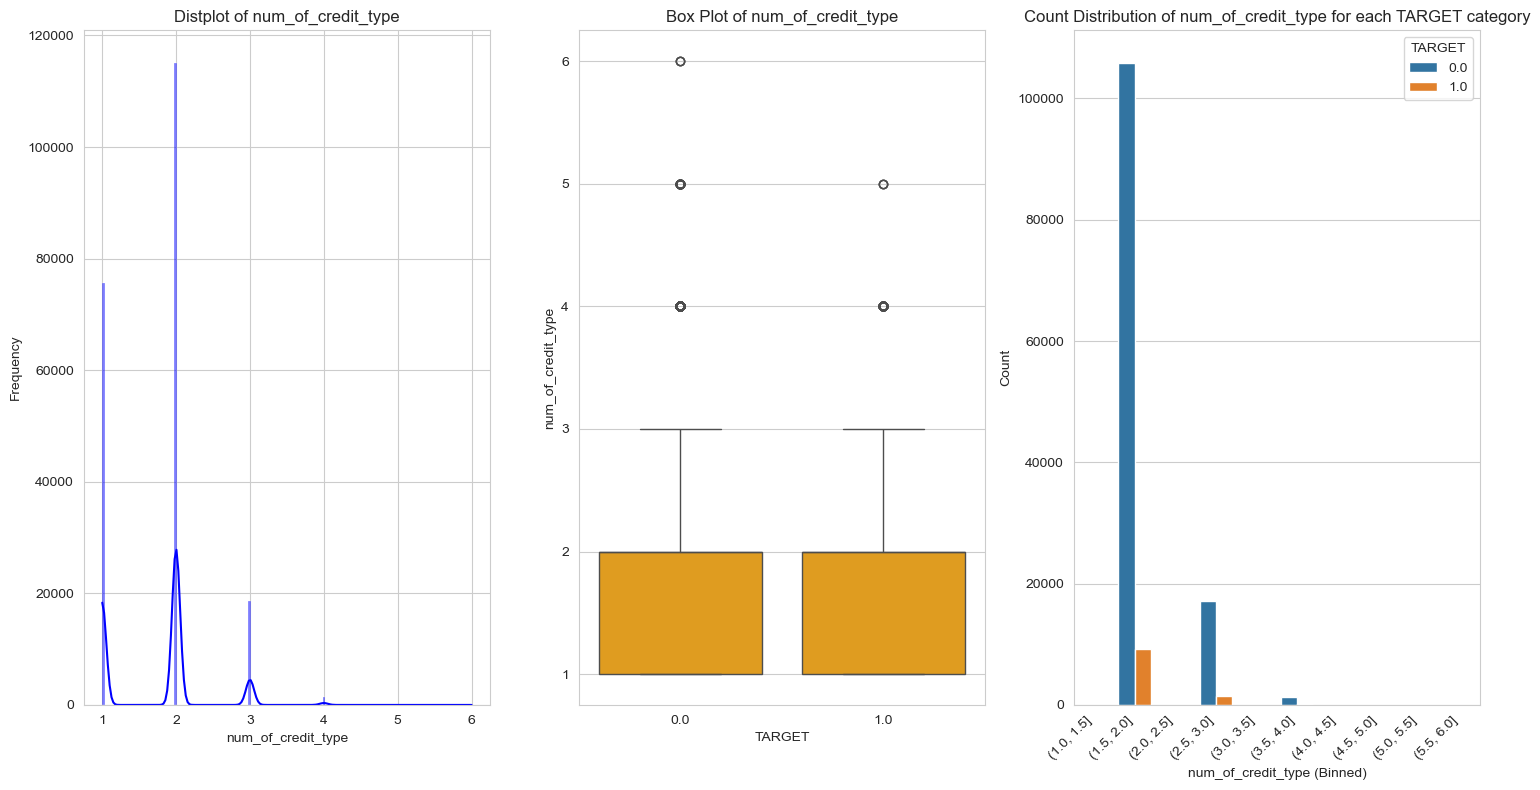

In [70]:
visualize_count_distribution(num_of_type_target, 'num_of_credit_type', num_bins=10, figsize=(15, 8))

Most customers have 2 types of loans before applying for credit bureau

The distribution is quite the same. This feature does not affect TARGET varibale

### The percentage of active loans per customer

In [56]:
merge_table['CREDIT_ACTIVE_BINARY'] = merge_table['CREDIT_ACTIVE']

def check(status):
    if status == 'Closed':
        result = 0
    else:
        result = 1 
    return result

merge_table['CREDIT_ACTIVE_BINARY'] = merge_table.apply(lambda x: check(x.CREDIT_ACTIVE), axis = 1)


atv_loans_target = merge_table.groupby(by = ['SK_ID_CURR', 'TARGET'])['CREDIT_ACTIVE_BINARY'].mean().reset_index().rename(index=str, columns={'CREDIT_ACTIVE_BINARY': 'ACTIVE_LOANS_PERCENTAGE'})
atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] = atv_loans_target['ACTIVE_LOANS_PERCENTAGE'] * 100
atv_loans_target

,SK_ID_CURR,TARGET,ACTIVE_LOANS_PERCENTAGE
0,0,0.0,100.000000
1,1,1.0,100.000000
2,2,0.0,33.333333
3,3,0.0,42.857143
4,4,0.0,50.000000
...,...,...,...
210804,307501,0.0,20.000000
210805,307504,0.0,25.000000
210806,307505,0.0,100.000000
210807,307506,0.0,0.000000


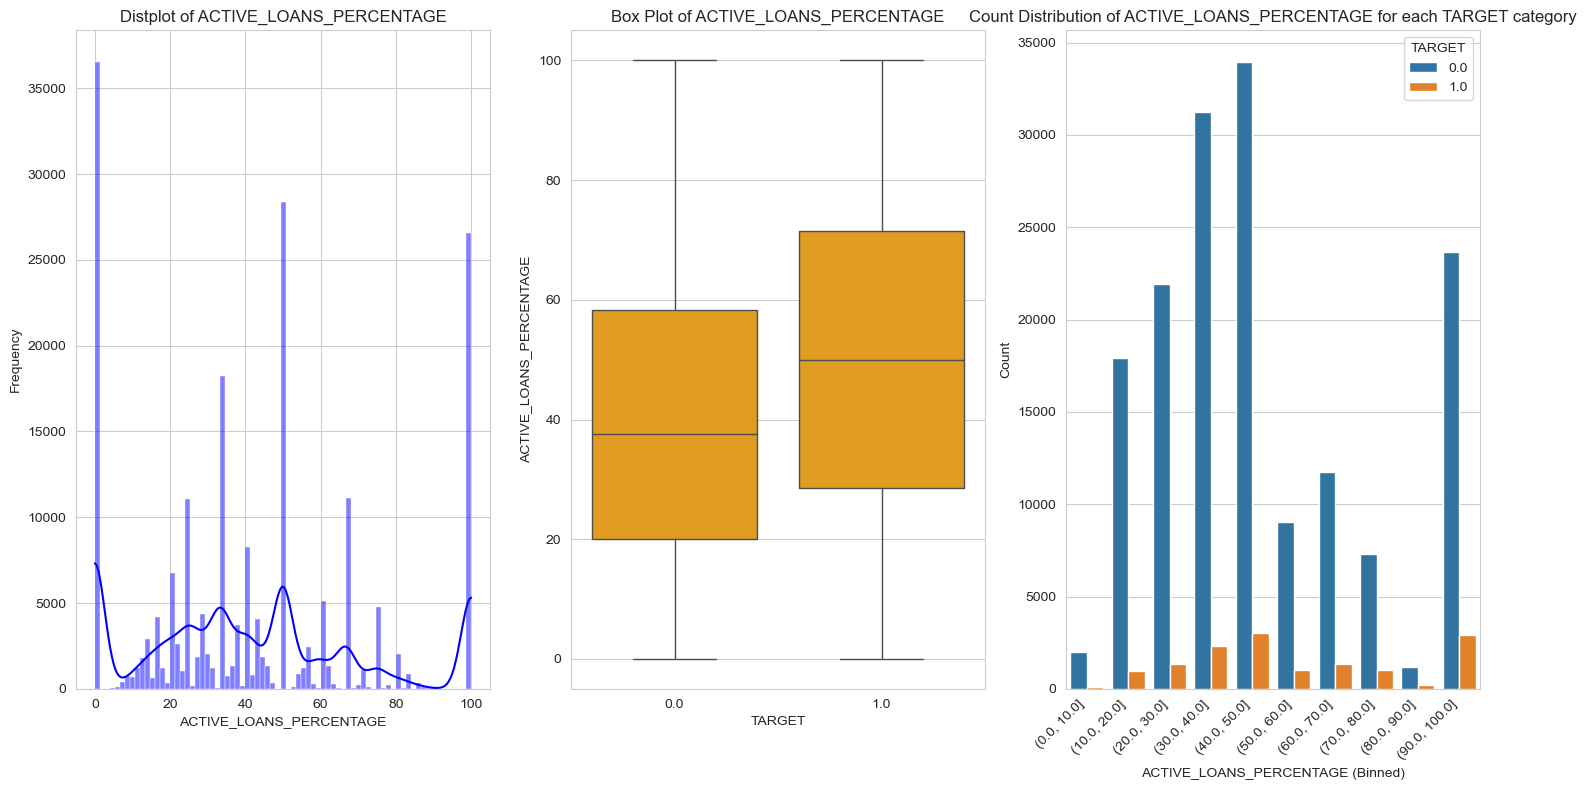

In [71]:
visualize_count_distribution(atv_loans_target, 'ACTIVE_LOANS_PERCENTAGE', num_bins=10, figsize=(15, 8))

The distribution is quite the same. This feature does not affect TARGET varibale

### The Ratio of Total Debt to Total Credit for each Customer

In [60]:
data_with_sum_debt_pos_sign = merge_table[merge_table['AMT_CREDIT_SUM_DEBT']>0]

grp1 = data_with_sum_debt_pos_sign[['SK_ID_CURR', 'AMT_CREDIT_SUM_DEBT']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM_DEBT'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM_DEBT': 'TOTAL_CUSTOMER_DEBT'})
grp2 = merge_table[['SK_ID_CURR', 'AMT_CREDIT_SUM']].groupby(by = ['SK_ID_CURR'])['AMT_CREDIT_SUM'].sum().reset_index().rename( index = str, columns = { 'AMT_CREDIT_SUM': 'TOTAL_CUSTOMER_CREDIT'})

merge_table = merge_table.merge(grp1, on = ['SK_ID_CURR'], how = 'left')
merge_table = merge_table.merge(grp2, on = ['SK_ID_CURR'], how = 'left')
del grp1, grp2


merge_table['DEBT_CREDIT_RATIO'] = (merge_table['TOTAL_CUSTOMER_DEBT']/merge_table['TOTAL_CUSTOMER_CREDIT'])*100
merge_table['DEBT_CREDIT_RATIO'] = merge_table['DEBT_CREDIT_RATIO'].replace([np.inf, -np.inf], np.nan)

del merge_table['TOTAL_CUSTOMER_DEBT'], merge_table['TOTAL_CUSTOMER_CREDIT']

debt_credit_target = merge_table.groupby(by = ['SK_ID_CURR','TARGET'])['DEBT_CREDIT_RATIO'].mean().reset_index().rename(index=str)
debt_credit_target

,SK_ID_CURR,TARGET,DEBT_CREDIT_RATIO
0,0,0.0,90.706731
1,1,1.0,NaN
2,2,0.0,37.908544
3,3,0.0,41.072109
4,4,0.0,44.445915
...,...,...,...
210804,307501,0.0,74.140954
210805,307504,0.0,13.827518
210806,307505,0.0,NaN
210807,307506,0.0,NaN


In [61]:
debt_credit_target = debt_credit_target[debt_credit_target['DEBT_CREDIT_RATIO'] <= 100]

C:\Users\Admin\AppData\Local\Temp\ipykernel_26440\2559986016.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merge_table['binned'] = pd.cut(merge_table[column_name], bins)


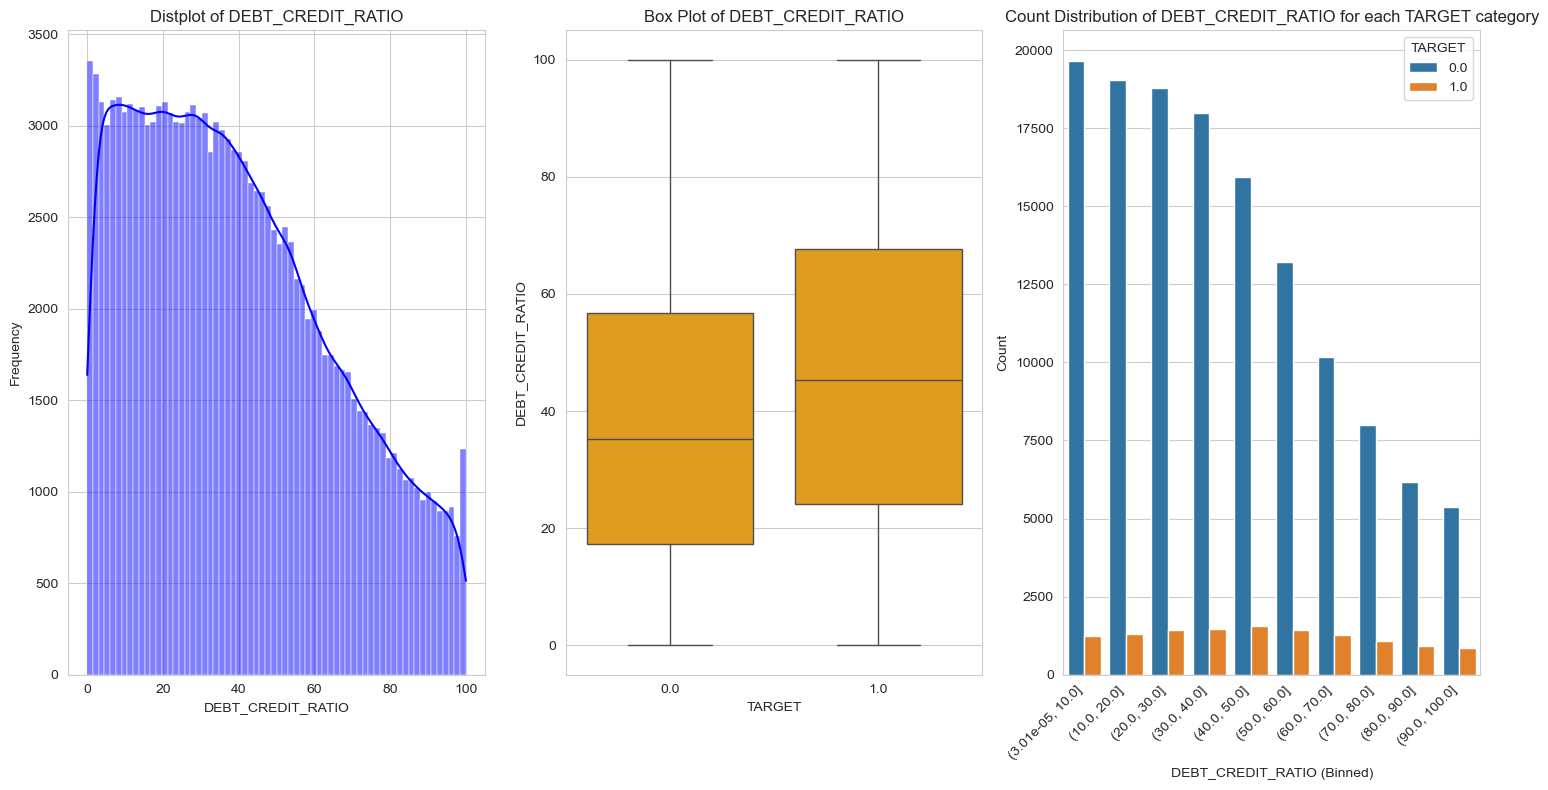

In [72]:
visualize_count_distribution(debt_credit_target, 'DEBT_CREDIT_RATIO', num_bins=10, figsize=(15, 8))

The distribution is quite the same. This feature does not affect TARGET varibale